# Calculations and comparison to experimental results for Pintle V1. 

For this notebook, Pintle refers both to the physical injector, and to the inner flow path(s) which will be taken by the Oxidizer.  Annulus refers to both to the gap between the outer diameter of the pintle and the engine, as well as the flow path to be taken by the fuel. 


In [1]:
import math
from mpmath import *
import numpy as np
from matplotlib import pyplot as plt

# Engine mass flow rate requirment (as designed)

pintle_mdot           = 0.4082332     # kg/s (0.9 lbm/s)  , desired LOX mass flow rate
annulus_mdot          = 0.5261671     # kg/s (1.16 lbm/s) , desired Fuel mass flow rate

# Fluid properties

fluid_pintle  = 'LOX'
fluid_annulus = 'IPA'

if fluid_pintle == 'water':
    pintle_rho        = 999.7          # kg/m^3
    pintle_dynvisc    = 0.001307   # N*s/m^2

elif fluid_pintle == 'LOX':
    pintle_rho        = 1141        # kg/m^3
    pintle_dynvisc    = 0.0001971   # N*s/m^2

if fluid_annulus == 'water':
    annulus_rho       = 999.7          # kg/m^3
    annulus_dynvisc   = 0.001307       # N*s/m^2

elif fluid_annulus == 'IPA':
    annulus_rho       = 877.8         # kg/m^3  
    annulus_dynvisc   = 0.002         # N*s/m^2

# flow geometry for V_1 pintle 

pintle_entrance_dia   = 0.010211   # m (0.402 in pipe diameter)
pintle_inner_dia      = 0.003048   # m (0.12 in)
pintle_exit_dia       = 0.0006604  # m (0.026 in = 0.0006604 m)

pipe_diameter         = 0.010211    # m (0.402 " pipe diameter)
annulus_entrance_dia  = 0.0034544   # m (0.136 in) 
annulus_chamber_dia   = 0.0109855   # m (0.865 in)
annulus_inner_dia     = 0.0071374   # m (0.281 in) The outer diameter of the pintle
annulus_outer_dia     = 0.0078867   # m (0.3105 in)
annulus_hydrolic_dia  = annulus_outer_dia - annulus_inner_dia


    
# Area calculations

pintle_entrance_area  = math.pi*(pintle_entrance_dia/2)**2        # m^2 , flow area 1
pintle_inner_area     = math.pi*(pintle_inner_dia/2)**2        # m^2 , flow area 2
pintle_exit_area      = 12 * math.pi*(pintle_exit_dia/2)**2   # m^2 , flow area 3, 12 small diameter holes

pipe_area             = math.pi*(pipe_diameter/2)**2        # m^2 , flow area 1
annulus_entrance_area = math.pi*(annulus_entrance_dia/2)**2        # m^2 , flow area 2
annulus_chamber_area  = math.pi*(annulus_chamber_dia/2)**2        # m^2 , flow area 3
annulus_inner_area    = math.pi*(annulus_inner_dia/2)**2   # m^2 , flow area 4, 12 small diameter holes
annulus_outer_area    = math.pi*(annulus_outer_dia/2)**2   # m^2 , flow area 4, 12 small diameter holes
annulus_exit_area     = annulus_outer_area - annulus_inner_area


# velocity calculations

pintle_velocity_entrance  = pintle_mdot / (pintle_rho * pintle_entrance_area)  
pintle_inner_velocity     = pintle_mdot / (pintle_rho * pintle_inner_area)  
pintle_velocity_exit      = pintle_mdot / (pintle_rho * pintle_exit_area) 

pipe_fuel_velocity        = annulus_mdot / (annulus_rho * pipe_area)
annulus_entrance_velocity = annulus_mdot / (annulus_rho * annulus_entrance_area) 
annulus_entrance_velocity = annulus_mdot / (annulus_rho * annulus_entrance_area)  
annulus_chamber_velocity  = annulus_mdot / (annulus_rho * annulus_chamber_area)  
annulus_exit_velocity     = annulus_mdot / (annulus_rho * annulus_exit_area) 

# Reynolds numbers

pintle_re_1 = (pintle_rho*pintle_velocity_entrance*pintle_entrance_dia)/pintle_dynvisc 
pintle_re_2 = (pintle_rho*pintle_inner_velocity*pintle_inner_dia)/pintle_dynvisc 
pintle_re_3 = (pintle_rho*pintle_velocity_exit*pintle_exit_dia)/pintle_dynvisc 

annulus_re_1 = (annulus_rho*pipe_fuel_velocity*pipe_diameter)/annulus_dynvisc 
annulus_re_2 = (annulus_rho*annulus_entrance_velocity*annulus_entrance_dia)/annulus_dynvisc 
annulus_re_3 = (annulus_rho*annulus_chamber_velocity*annulus_chamber_dia)/annulus_dynvisc 
annulus_re_4 = (annulus_rho*annulus_exit_velocity*annulus_hydrolic_dia)/annulus_dynvisc 

# Loss coefficents; taken from Fluids textbook

pintle_k_1 = 0.07   # loss coefficient for first entrance region
pintle_k_2 = 2      # inner region  (originally using 2, 3 puts this inline with experiment)
pintle_k_3 = 1      # Exit region (originally used value of 1, 4 puts this inline with experiment)


annulus_k_1 = 0.38      # Pipe to test jig
annulus_k_2 = 1         # Test jig to fuel chamber
annulus_k_3 = 0.04      # Fuel Chamber to annulus
annulus_k_4 = 1         # Exit region

# calculated head losses in kPa

pintle_hL_1 = (pintle_k_1*0.5*pintle_rho*pintle_velocity_entrance**2)/1000 
pintle_hL_2 = (pintle_k_2*0.5*pintle_rho*pintle_inner_velocity**2)/1000 
pintle_hL_3 = (pintle_k_3*0.5*pintle_rho*pintle_velocity_exit**2)/1000 

annulus_hL_1 = (annulus_k_1*0.5*annulus_rho*pipe_fuel_velocity**2)/1000 
annulus_hL_2 = (annulus_k_2*0.5*annulus_rho*annulus_entrance_velocity**2)/1000 
annulus_hL_3 = (annulus_k_3*0.5*annulus_rho*annulus_chamber_velocity**2)/1000 
annulus_hL_4 = (annulus_k_4*0.5*annulus_rho*annulus_exit_velocity**2)/1000 

#convert to psi from kPa

pintle_hL_1_psi = pintle_hL_1 * 0.1450377    
pintle_hL_2_psi = pintle_hL_2 * 0.1450377    
pintle_hL_3_psi = pintle_hL_3 * 0.1450377    
pintle_hL_total_psi = (pintle_hL_1_psi+pintle_hL_2_psi+pintle_hL_3_psi) #* 2.5 #correction factor  


annulus_hL_1_psi = annulus_hL_1 * 0.1450377  
annulus_hL_2_psi = annulus_hL_2 * 0.1450377    
annulus_hL_3_psi = annulus_hL_3 * 0.1450377    
annulus_hL_4_psi = annulus_hL_4 * 0.1450377    
annulus_hL_total_psi = (annulus_hL_1_psi+annulus_hL_2_psi+annulus_hL_3_psi+annulus_hL_4_psi)  




print("Calculations for the current pintle design\n")
print('Pintle calculations if using %s\n' %fluid_pintle)
print('Pintle entrance velocity    = %8.3f m/s' % pintle_velocity_entrance)
print('Pintle inner velocity       = %8.3f m/s' % pintle_inner_velocity)
print('Pintle exit velocity        = %8.3f m/s\n' % pintle_velocity_exit)

print('Pintle entrance Reynolds #  = %8.0f' % pintle_re_1)
#print('Pintle Reynolds # 2         = %10.0f' % pintle_re_2)
print('Pintle exit Reynolds #      = %8.0f\n' % pintle_re_3)

print('Pintle headloss 1           = %8.3f psi' % pintle_hL_1_psi)
print('Pintle headloss 2           = %8.3f psi' % pintle_hL_2_psi)
print('Pintle headloss 3           = %8.3f psi' % pintle_hL_3_psi)
print('Pintle Total head loss      = %8.2f psi\n' % pintle_hL_total_psi)

print('Annulus calculations if using %s\n' %fluid_annulus)
print('Pipe fuel velocity          = %8.3f m/s' % pipe_fuel_velocity)
print('annulus entrance velocity   = %8.3f m/s' % annulus_entrance_velocity)
print('annulus inner velocity      = %8.3f m/s' % annulus_chamber_velocity)
print('annulus exit velocity       = %8.3f m/s\n' % annulus_exit_velocity)

print('annulus entrance Reynolds # = %8.0f' % annulus_re_1)
#print('annulus Reynolds # 2        = %10.3f' % annulus_re_2)
print('annulus exit Reynolds #     = %8.0f\n' % annulus_re_3)

#print('annulus headloss 1          = %8.3f psi' % annulus_hL_1_psi)
#print('annulus headloss 2          = %8.3f psi' % annulus_hL_2_psi)
#print('annulus headloss 3          = %8.3f psi' % annulus_hL_3_psi)
#print('annulus headloss 3          = %8.3f psi' % annulus_hL_4_psi)
print('annulus Total head loss     = %8.2f psi\n' % annulus_hL_total_psi)




Calculations for the current pintle design

Pintle calculations if using LOX

Pintle entrance velocity    =    4.369 m/s
Pintle inner velocity       =   49.035 m/s
Pintle exit velocity        =   87.044 m/s

Pintle entrance Reynolds #  =   258264
Pintle exit Reynolds #      =   332769

Pintle headloss 1           =    0.111 psi
Pintle headloss 2           =  397.898 psi
Pintle headloss 3           =  626.919 psi
Pintle Total head loss      =  1024.93 psi

Annulus calculations if using IPA

Pipe fuel velocity          =    7.320 m/s
annulus entrance velocity   =   63.958 m/s
annulus inner velocity      =    6.324 m/s
annulus exit velocity       =   67.794 m/s

annulus entrance Reynolds # =    32805
annulus exit Reynolds #     =    30492

annulus Total head loss     =   554.37 psi



# Calculations from experimental data for Pintle Version 1

In [2]:
import math

#measured data
pintle_psi_1   = 48.76  ; pintle_psi_2   = 49.49  ; pintle_psi_3   = 70.5   ;
pintle_gpm_1   = 1.01   ; pintle_gpm_2   = 1.01   ; pintle_gpm_3   = 1.18   ;
annulus_psi_1  = 61.57  ; annulus_psi_2  = 61.66  ; annulus_psi_3  = 61.09  ;
annulus_gpm_1   = 2.43  ; annulus_gpm_2  = 2.41   ; annulus_gpm_3  = 2.39   ;

#Average values
pintle_delta_pressure_psi  = (pintle_psi_1 + pintle_psi_2 + pintle_psi_3)/3  # psi
pintle_flow_rate_gpm       = (pintle_gpm_1 + pintle_gpm_2 + pintle_gpm_3)/3
annulus_delta_pressure_psi = (annulus_psi_1 + annulus_psi_2 + annulus_psi_3)/3  # psi
annulus_flow_rate_gpm      = (annulus_gpm_1 + annulus_gpm_2 + annulus_gpm_3)/3  # gpm

#conversions and constants
gpm_to_si = 6.30902e-5 # convert gpm to m^3/s
rho_water = 999.7     #kg/m^3 : density of water at 10 C

# convert measured pressure from PSI to pa

pintle_headloss = (pintle_delta_pressure_psi / 0.1450377 )*1000     
annulus_headloss = (annulus_delta_pressure_psi / 0.1450377 )*1000   

# Mass flow rate

pintle_mass_flowrate = pintle_flow_rate_gpm * gpm_to_si * rho_water
annulus_mass_flowrate = annulus_flow_rate_gpm * gpm_to_si * rho_water 

# Pressure loss coeffient per Eq 5

pintle_C_loss = pintle_mass_flowrate /(rho_water*(math.sqrt((2*pintle_headloss)/rho_water)))
annulus_C_loss = annulus_mass_flowrate / (rho_water*math.sqrt((2*annulus_headloss)/rho_water))

#pressure needed estimated with loss coefficient:

estimated_pintle_pressure = ((0.4082332**2/(pintle_C_loss**2*2*rho_water))/1000)*0.1450377
estimated_annulus_pressure = ((0.4082332**2/(annulus_C_loss**2*2*rho_water))/1000)*0.1450377

print('Pintle measured mass flow rate         = %8.3f kg/s' % pintle_mass_flowrate)
print('Annulus measured mass flow rate        = %8.3f kg/s \n' % annulus_mass_flowrate)

print('Loss coefficient for pintle            = %12.3e' % pintle_C_loss)
print('Loss coefficient for annulus           = %12.3e \n' % annulus_C_loss)

print('Pressure estimate, pintle              = %8.1f psi' % estimated_pintle_pressure)
print('Pressure estimate, annulus             = %8.1f psi' % estimated_annulus_pressure)

Pintle measured mass flow rate         =    0.067 kg/s
Annulus measured mass flow rate        =    0.152 kg/s 

Loss coefficient for pintle            =    2.416e-06
Loss coefficient for annulus           =    5.223e-06 

Pressure estimate, pintle              =   2071.2 psi
Pressure estimate, annulus             =    443.2 psi


In [3]:

# Desired flow parameters

pintle_mdot = pintle_mass_flowrate     # kg/s  , experimental pintle mass flow rate
annulus_mdot = annulus_mass_flowrate     # kg/s  , experimental annulus mass flow rate
    

# flow geometry for V_1 pintle 

# Fluid properties

fluid_pintle  = 'LOX'
fluid_annulus = 'IPA'

if fluid_pintle == 'water':
    pintle_rho = 999.7          # kg/m^3
    pintle_dynvisc = 0.001307   # N*s/m^2

elif fluid_pintle == 'LOX':
    pintle_rho     = 1141        # kg/m^3
    pintle_dynvisc = 0.0001971   # N*s/m^2

if fluid_annulus == 'water':
    annulus_rho       = 999.7          # kg/m^3
    annulus_dynvisc   = 0.001307       # N*s/m^2

elif fluid_annulus == 'IPA':
    annulus_rho       = 877.8         # kg/m^3  
    annulus_dynvisc   = 0.002         # N*s/m^2
    
    
# Area calculations from above

# updated velocity calculations

pintle_velocity_entrance = pintle_mdot / (pintle_rho * pintle_entrance_area)  
pintle_inner_velocity = pintle_mdot / (pintle_rho * pintle_inner_area)  
pintle_velocity_exit = pintle_mdot / (pintle_rho * pintle_exit_area) 

annulus_entrance_velocity = annulus_mdot / (annulus_rho * annulus_entrance_area)  
annulus_chamber_velocity = annulus_mdot / (annulus_rho * annulus_chamber_area)  
annulus_exit_velocity = annulus_mdot / (annulus_rho * annulus_exit_area) 

# updated Reynolds numbers

pintle_re_1 = (pintle_rho*pintle_velocity_entrance*pintle_entrance_dia)/pintle_dynvisc 
pintle_re_2 = (pintle_rho*pintle_inner_velocity*pintle_inner_dia)/pintle_dynvisc 
pintle_re_3 = (pintle_rho*pintle_velocity_exit*pintle_exit_dia)/pintle_dynvisc 

annulus_re_1 = (annulus_rho*annulus_entrance_velocity*annulus_entrance_dia)/annulus_dynvisc 
annulus_re_2 = (annulus_rho*annulus_chamber_velocity*annulus_chamber_dia)/annulus_dynvisc 
annulus_re_3 = (annulus_rho*annulus_exit_velocity*annulus_hydrolic_dia)/annulus_dynvisc 

# Loss coefficents; taken from Fluids textbook

pintle_k_1 = 0.07   # loss coefficient for first entrance region
pintle_k_2 = 2      # inner region
pintle_k_3 = 1      # Exit region

annulus_k_1 = 1         # loss coefficient for first entrance region
annulus_k_2 = 0.04      # Fuel Chamber to annulus
annulus_k_3 = 1         # Exit region

# calculated head losses in kPa

pintle_hL_1 = (pintle_k_1*0.5*pintle_rho*pintle_velocity_entrance**2)/1000
pintle_hL_2 = (pintle_k_2*0.5*pintle_rho*pintle_inner_velocity**2)/1000 
pintle_hL_3 = (pintle_k_3*0.5*pintle_rho*pintle_velocity_exit**2)/1000

annulus_hL_1 = (annulus_k_1*0.5*annulus_rho*annulus_entrance_velocity**2)/1000 
annulus_hL_2 = (annulus_k_2*0.5*annulus_rho*annulus_chamber_velocity**2)/1000 
annulus_hL_3 = (annulus_k_3*0.5*annulus_rho*annulus_exit_velocity**2)/1000 

#convert to psi from kPa

pintle_hL_1_psi = pintle_hL_1 * 0.1450377    
pintle_hL_2_psi = pintle_hL_2 * 0.1450377    
pintle_hL_3_psi = pintle_hL_3 * 0.1450377    
pintle_hL_total_psi = (pintle_hL_1_psi+pintle_hL_2_psi+pintle_hL_3_psi)


annulus_hL_1_psi = annulus_hL_1 * 0.1450377    
annulus_hL_2_psi = annulus_hL_2 * 0.1450377    
annulus_hL_3_psi = annulus_hL_3 * 0.1450377    
annulus_hL_total_psi = (annulus_hL_1_psi+annulus_hL_2_psi+annulus_hL_3_psi)



print("Analysis of experimental data for Pintle V1 \n")
print('Pintle entrance velocity    = %8.3f m/s' % pintle_velocity_entrance)
print('Pintle inner velocity       = %8.3f m/s' % pintle_inner_velocity)
print('Pintle exit velocity        = %8.3f m/s\n' % pintle_velocity_exit)

print('Pintle entrance Reynolds #  = %8.0f' % pintle_re_1)
#print('Pintle Reynolds # 2         = %10.0f' % pintle_re_2)
print('Pintle exit Reynolds #      = %8.0f\n' % pintle_re_3)

#print('Pintle headloss 1           = %8.3f psi' % pintle_hL_1_psi)
#print('Pintle headloss 2           = %8.3f psi' % pintle_hL_2_psi)
#print('Pintle headloss 3           = %8.3f psi' % pintle_hL_3_psi)
print('calculated Pintle head loss  = %8.1f psi' % pintle_hL_total_psi)
print('Pintle measured head loss    = %8.1f psi' % pintle_delta_pressure_psi)


print('Annulus calculations if using %s\n' %fluid_annulus)
print('annulus entrance velocity   = %8.3f m/s' % annulus_entrance_velocity)
print('annulus inner velocity      = %8.3f m/s' % annulus_chamber_velocity)
print('annulus exit velocity       = %8.3f m/s\n' % annulus_exit_velocity)

print('annulus entrance Reynolds # = %8.0f' % annulus_re_1)
#print('annulus Reynolds # 2        = %10.3f' % annulus_re_2)
print('annulus exit Reynolds #     = %8.0f\n' % annulus_re_3)

#print('annulus headloss 1          = %8.3f psi' % annulus_hL_1_psi)
#print('annulus headloss 2          = %8.3f psi' % annulus_hL_2_psi)
#print('annulus headloss 3          = %8.3f psi' % annulus_hL_3_psi)
print('annulus calculated head loss  = %8.1f psi' % annulus_hL_total_psi)
print('annulus measured head loss    = %8.1f psi' % annulus_delta_pressure_psi)




Analysis of experimental data for Pintle V1 

Pintle entrance velocity    =    0.720 m/s
Pintle inner velocity       =    8.081 m/s
Pintle exit velocity        =   14.345 m/s

Pintle entrance Reynolds #  =    42561
Pintle exit Reynolds #      =    54840

calculated Pintle head loss  =     27.8 psi
Pintle measured head loss    =     56.2 psi
Annulus calculations if using IPA

annulus entrance velocity   =   18.476 m/s
annulus inner velocity      =    1.827 m/s
annulus exit velocity       =   19.585 m/s

annulus entrance Reynolds # =    28013
annulus exit Reynolds #     =     6441

annulus calculated head loss  =     46.2 psi
annulus measured head loss    =     61.4 psi


graphical estimate of pressure vs. mass flow rate; blue were measured values, red are predicted


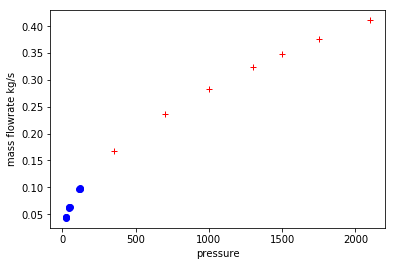

In [4]:
import numpy as np
from matplotlib import pyplot as plt


pintle_measured_pressure = np.array([24.452, 25.362, 23.07, 48.53, 47.628, 51.247, 117.6, 119.06, 115.0,])
pintle_predicted_pressure =  np.array([350, 700, 1000, 1300, 1500, 1750, 2100])

estimated_mdot = []
predicted_mdot = []
pintle_measured_kpa = []
pintle_predicted_kpa = []

for n in range(len(pintle_measured_pressure)):
    pintle_measured_kpa.append(((pintle_measured_pressure[n]) / 0.1450377 )*1000)
    estimated_mdot.append(pintle_C_loss * np.sqrt(2*rho_water* (pintle_measured_kpa[n]) ))

for n in range(len(pintle_predicted_pressure)):
    pintle_predicted_kpa.append(((pintle_predicted_pressure[n]) / 0.1450377 )*1000)
    predicted_mdot.append(pintle_C_loss * np.sqrt(2*rho_water* ( pintle_predicted_kpa[n]) ))


print('graphical estimate of pressure vs. mass flow rate; blue were measured values, red are predicted')

plt.plot(pintle_measured_pressure, estimated_mdot,'bo',
         pintle_predicted_pressure, predicted_mdot,'r+')
plt.xlabel('pressure')
plt.ylabel('mass flowrate kg/s')
plt.show()